In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import numpy as np

from nltk.stem.snowball import EnglishStemmer
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [10]:
df.shape

(7613, 5)

In [5]:
df.loc[~df['keyword'].isna(), :].head()

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


In [9]:
df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [13]:
df[df.duplicated()]

,id,keyword,location,text,target


In [14]:
df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

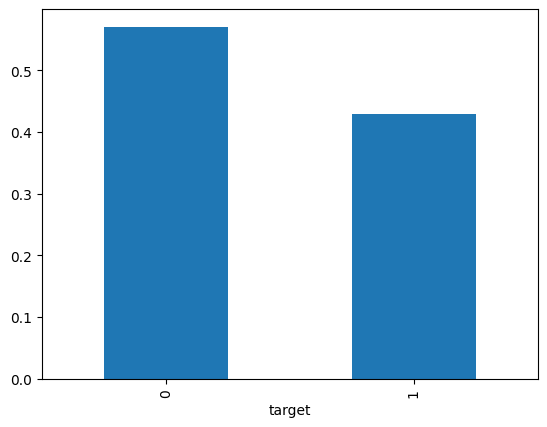

In [54]:
df['target'].value_counts(normalize=True).plot.bar()
plt.show()

In [18]:
df[df['id'].duplicated()]

,id,keyword,location,text,target


In [24]:
df['text_len'] = df['text'].str.len()

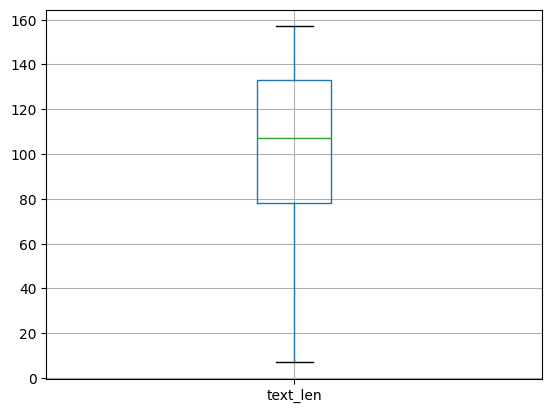

In [37]:
import matplotlib.pyplot as plt
df.boxplot(column='text_len', showfliers=True)
plt.show()

In [55]:
df.sample(n=20)

,id,keyword,location,text,target,text_len
1501,2164,catastrophic,NaN,The Catastrophic Effects of Hiroshima and Naga...,1,112
3577,5110,famine,Charter Member of the VRWC,Russian 'food crematoria' provoke outrage amid...,1,105
7596,10851,NaN,NaN,RT @LivingSafely: #NWS issues Severe #Thunders...,1,134
1753,2521,collision,Mumbai,ThisIsFaz: Anti Collision Rear- #technology #c...,0,93
6289,8985,storm,"Cleveland, OH - San Diego, CA",#NASA announced that a massive #solar storm is...,1,93
4266,6060,heat%20wave,NaN,NOT.. Ready for this heat wave .. I don't want...,1,115
7014,10055,twister,NaN,Some curls come out so pretty and some look li...,0,91
1836,2641,crashed,NaN,I already had my phone updated to 8.4 and some...,0,128
3216,4614,emergency%20services,NaN,Brooklyn locksmith: domesticate emergency mech...,0,113
3161,4538,emergency,NaN,Busty blonde teen Natalia Starr fucks the secu...,0,110


In [190]:
def tokenize(document):
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(document)

    sw = set()
    sw.update([token for token in tokens if len(token) < 3])
    sw.update(nltk.corpus.stopwords.words('french'))

    stemmer = EnglishStemmer()
    return [stemmer.stem(token) for token in tokens if not token in sw]

def keep_corpus(document, corpus_collection):
    items = [item for item in document if item in corpus_collection]
    if (len(document) > len(items)):
        print(document)
    return items

def corpus():
    df['tokens']  = df['text'].apply(tokenize)

    # Flatten corpus tokens
    corpus = [token for sublist in df['tokens'].to_list() for token in sublist]
    print(len(corpus))

    # Remove words used only 1 time
    token_counts = collections.Counter(corpus)
    corpus = [token for token in corpus if token_counts[token] > 1]

    df['tokens']  = df['tokens'].apply(keep_corpus, args=(token_counts,))

    return corpus

def word_cloud(corpus):
    wordcloud = WordCloud(background_color = 'white', max_words = 50).generate(' '.join(corpus))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show();

In [191]:
toto = collections.Counter(['t', 't', 'a'])
[item for item in ['t', 'b'] if item in toto]

['t']

In [192]:
corpus = corpus()
len(corpus)

96080


83243

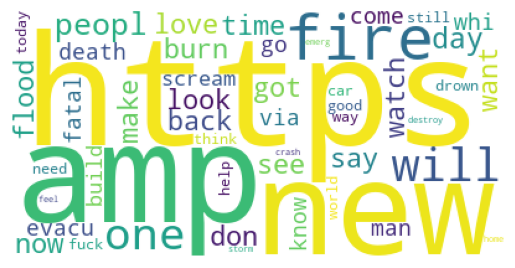

In [172]:
word_cloud(corpus)